In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import seaborn as sns
from wordcloud import WordCloud

# **label-studio all labels**

tanyel all targets

label    144
text     144
dtype: int64 gender
label    41
text     41
dtype: int64 homophobic
label    183
text     183
dtype: int64 religious
label    237
text     237
dtype: int64 ethnic
label    210
text     210
dtype: int64 other


all targets
label    815
text     815
dtype: int64


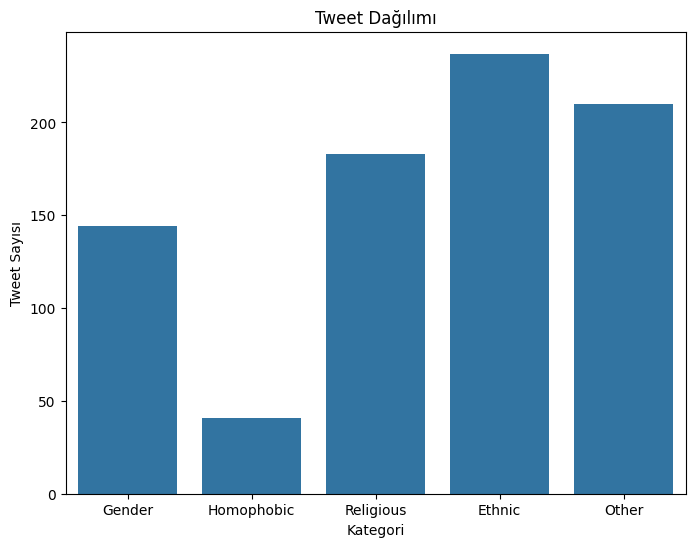

label    815
text     815
dtype: int64


In [ ]:
# Verileri yükle
all_labels = pd.read_csv('/content/tanyel_all_with_other818.csv')

gender = all_labels[all_labels['sentiment'] == 'kadın']
gender =gender[['sentiment','text']]
gender.rename(columns={'sentiment': 'label'}, inplace=True)
gender['label']=0

homophobic = all_labels[all_labels['sentiment'] == 'homofobik']
homophobic= homophobic[['sentiment','text']]
homophobic.rename(columns={'sentiment': 'label'}, inplace=True)
homophobic['label']=1


religious = all_labels[all_labels['sentiment'] == 'dini']
religious= religious[['sentiment','text']]
religious.rename(columns={'sentiment': 'label'}, inplace=True)
religious['label']=2

ethnic = all_labels[all_labels['sentiment'] == 'etnik']
ethnic= ethnic[['sentiment','text']]
ethnic.rename(columns={'sentiment': 'label'}, inplace=True)
ethnic['label']=3

other = all_labels[all_labels['sentiment'] == 'other']
other= other[['sentiment','text']]
other.rename(columns={'sentiment': 'label'}, inplace=True)
other['label']=4

print(f"{gender.count()} gender")
print(f"{homophobic.count()} homophobic")
print(f"{religious.count()} religious")
print(f"{ethnic.count()} ethnic")
print(f"{other.count()} other")

print("\n\nall targets")
gender.count()+homophobic.count()+religious.count()+ethnic.count()+other.count()
target=pd.concat([religious,ethnic,homophobic,gender,other])
print(target.count())
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=target)
ax.set_title('Tweet Dağılımı')
ax.set_xlabel('Kategori')
ax.set_ylabel('Tweet Sayısı')
plt.xticks([0, 1,2,3,4], ['Gender', 'Homophobic','Religious','Ethnic','Other'])  # Etiket isimlerini belirtiniz
plt.show()

target.drop_duplicates(inplace=True)
print(target.count())

beyhan gender homo

label    61
text     61
dtype: int64 gender
label    160
text     160
dtype: int64 homophobic
label    1036
text     1036
dtype: int64


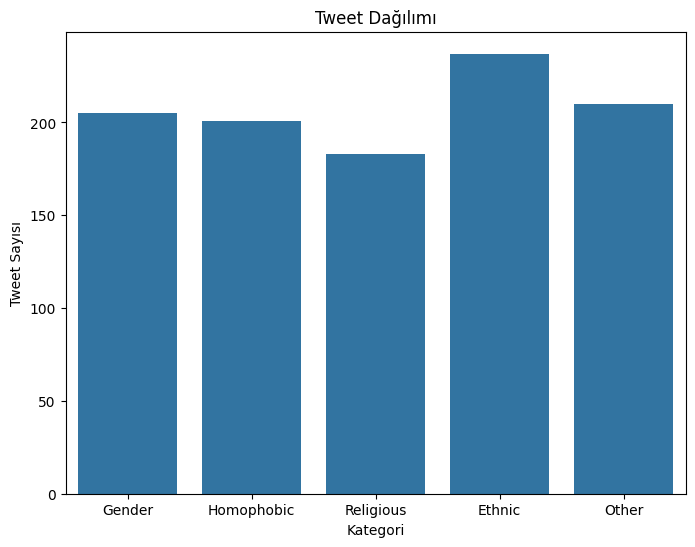

label    1034
text     1034
dtype: int64


In [ ]:
# Verileri yükle
all_labels = pd.read_csv('/content/Beyhan_gender_homo222.csv')

gender2 = all_labels[all_labels['sentiment'] == 'gender']
gender2 =gender2[['sentiment','text']]
gender2.rename(columns={'sentiment': 'label'}, inplace=True)
gender2['label']=0

homophobic2 = all_labels[all_labels['sentiment'] == 'homophobic']
homophobic2= homophobic2[['sentiment','text']]
homophobic2.rename(columns={'sentiment': 'label'}, inplace=True)
homophobic2['label']=1

print(f"{gender2.count()} gender")
print(f"{homophobic2.count()} homophobic")

target=pd.concat([target,gender2,homophobic2])
print(target.count())
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=target)
ax.set_title('Tweet Dağılımı')
ax.set_xlabel('Kategori')
ax.set_ylabel('Tweet Sayısı')
plt.xticks([0, 1,2,3,4], ['Gender', 'Homophobic','Religious','Ethnic','Other'])  # Etiket isimlerini belirtiniz
plt.show()

target.drop_duplicates(inplace=True)
print(target.count())

concat with dini

label    1084
text     1084
dtype: int64


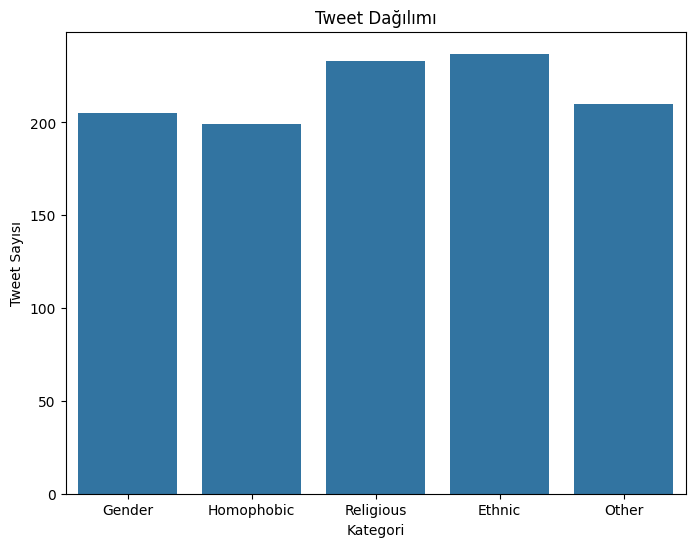

label    1084
text     1084
dtype: int64


In [ ]:
dini= pd.read_csv('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/all_targets/dini.csv')
dini=dini.iloc[:50]
target=pd.concat([target,dini])
print(target.count())
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=target)
ax.set_title('Tweet Dağılımı')
ax.set_xlabel('Kategori')
ax.set_ylabel('Tweet Sayısı')
plt.xticks([0, 1,2,3,4], ['Gender', 'Homophobic','Religious','Ethnic','Other'])  # Etiket isimlerini belirtiniz
plt.show()

target.drop_duplicates(inplace=True)
print(target.count())

# save the target **file**

In [ ]:
target.to_csv('target_all_other.csv',index=False)

homofobik ve kadını ayır label-studio fileından

In [ ]:
# Verileri yükle
homofobik_gender = pd.read_csv('/content/project-18-at-2024-07-22-17-06-3aca4521.csv')

In [ ]:
gender = homofobik_gender[homofobik_gender['sentiment'] == 'gender']
gender =gender[['sentiment','text']]
gender.rename(columns={'sentiment': 'label'}, inplace=True)
gender['label']=0
gender.count()

label    61
text     61
dtype: int64

In [ ]:
homophobic = homofobik_gender[homofobik_gender['sentiment'] == 'homophobic']
homophobic= homophobic[['sentiment','text']]
homophobic.rename(columns={'sentiment': 'label'}, inplace=True)
homophobic['label']=1
homophobic.count()

<ipython-input-19-ecda957604fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homophobic.rename(columns={'sentiment': 'label'}, inplace=True)
<ipython-input-19-ecda957604fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homophobic['label']=1


label    94
text     94
dtype: int64

In [ ]:
homophobic

,label,text
0,1,milli ve manevi değerlerimizi yok eden lgtb de...
1,1,yumurta yemeye hayır bu bir katliamdır yaşayac...
2,1,lbtli bozuklar tepkimiz sondaki gibidir
3,1,evvela lgbt gibi cinsel sapkınlardan insanlık ...
5,1,kadın haklarını savunan bir sözleşme adı altın...
...,...,...
149,1,istanbul sozlesmesi denen igrenc yasadan kurtu...
150,1,ibne tayfasi korkmasin cunku onlar zaten ozgur...
152,1,erkek dusmani feministler lgbt li ibneler kina...
153,1,acaba baslarinda cananda olacak mi yanina lgbt...


In [ ]:

gender.to_csv('gender.csv', index=False)
homophobic.to_csv('homophobic.csv', index=False)

etnik verisinden 100 veri al

In [ ]:
# Verileri yükle
etnic = pd.read_csv('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/nefret_tweets_ethnic.csv')

In [ ]:
etnic=etnic.iloc[:100]

In [ ]:
etnic=etnic[['text','label']]
etnic

,text,label
0,suriyeli çetelerin evlilik vaadiyle kandırıp b...,3
1,türkiye de yerli vatandaşın birşey dediği yok ...,3
2,aynı babadan olma aynı anadan olmasınız yani k...,3
3,insanı boyuta bakacaksanız önce kendi vatandaş...,3
4,entegrasyon sistemi eğitimli ve kişilikli insa...,3
...,...,...
95,direkt hükmete geliyorsun adamlara göre türk o...,3
96,düne kadar ülkemde suriyeli istemiyorum diyenl...,3
97,haklısın nefret ettinizde onları ülkeye doldur...,3
98,bu chp ve ekibi tam bir tiyatrocu suriyelileri...,3


In [ ]:
etnic['label']=3
etnic

<ipython-input-49-0521aeee7680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etnic['label']=3


,text,label
0,suriyeli çetelerin evlilik vaadiyle kandırıp b...,3
1,türkiye de yerli vatandaşın birşey dediği yok ...,3
2,aynı babadan olma aynı anadan olmasınız yani k...,3
3,insanı boyuta bakacaksanız önce kendi vatandaş...,3
4,entegrasyon sistemi eğitimli ve kişilikli insa...,3
...,...,...
95,direkt hükmete geliyorsun adamlara göre türk o...,3
96,düne kadar ülkemde suriyeli istemiyorum diyenl...,3
97,haklısın nefret ettinizde onları ülkeye doldur...,3
98,bu chp ve ekibi tam bir tiyatrocu suriyelileri...,3


In [ ]:
etnic.to_csv('etnik.csv', index=False)

offens-ai'dan gender verisi alıncak

In [ ]:
# prompt: gsheet reading

import pandas as pd
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('offenseval-tr-training-v1').sheet1 # replace 'Your spreadsheet name'

rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)


In [ ]:
df

,0,1,2
0,id,tweet,subtask_a
1,20948,@USER en güzel uyuyan insan ödülü jeon jungkoo...,NOT
2,10134,"@USER Mekanı cennet olsun, saygılar sayın avuk...",NOT
3,23457,Kızlar aranızda kas yığını beylere düşenler ol...,NOT
4,18401,Biraz ders çalışayım. Tembellik ve uyku düşman...,NOT
...,...,...,...
31273,39603,"Bu ödül sunan kızı kim giydirdiyse, kızın en b...",NOT
31274,26675,Bunu sana beddua olarak etmiyorum bunlar ilerd...,NOT
31275,17172,CHP'liler sandıkları bırakmıyor üstüne oturmuş...,OFF
31276,42884,karanlığın içinde yalnız kalsam ne oluuuuurr,NOT


In [ ]:
# prompt: df'yi columnları 0. indexteki değerler olarak düzelt

# df'yi columnları 0. indexteki değerler olarak düzelt
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df


,id,tweet,subtask_a
1,20948,@USER en güzel uyuyan insan ödülü jeon jungkoo...,NOT
2,10134,"@USER Mekanı cennet olsun, saygılar sayın avuk...",NOT
3,23457,Kızlar aranızda kas yığını beylere düşenler ol...,NOT
4,18401,Biraz ders çalışayım. Tembellik ve uyku düşman...,NOT
5,17525,@USER Trezeguet yerine El Sharawy daha iyi olm...,NOT
...,...,...,...
31273,39603,"Bu ödül sunan kızı kim giydirdiyse, kızın en b...",NOT
31274,26675,Bunu sana beddua olarak etmiyorum bunlar ilerd...,NOT
31275,17172,CHP'liler sandıkları bırakmıyor üstüne oturmuş...,OFF
31276,42884,karanlığın içinde yalnız kalsam ne oluuuuurr,NOT


In [ ]:
df = df[df['tweet'].str.contains("orospu")]
df= df[['tweet','subtask_a']]
df.rename(columns={'tweet': 'text'}, inplace=True)
df.rename(columns={'subtask_a': 'label'}, inplace=True)
df = df[df['label'] == 'OFF']
df['label']=1
df


,text,label
75,Gün geçmiyorki amk ülkesinde düzgün bir haber ...,1
108,@USER @USER Ne evli cifti lan orospu ve pezeve...,1
203,Bence de hırsıza yolsuza Rum’a Bizans’a gavura...,1
601,sanane orospu çocu çirkinsem ben çirkinim götü...,1
973,@USER Lan amına goduklarım. Yırtık dondan çıka...,1
...,...,...
30249,"ben sizin gel gitlerinizle, sayısız hatalarını...",1
30260,Ersun yanal topunuzun anasını siksin orospu ço...,1
30263,Futbolcuları popülerizm ayağına yalayan şunca ...,1
30494,@USER @USER @USER Ya orospu çocuğu ne ekmeği a...,1


In [ ]:
df['label']=0
df=df.iloc[:50]
df

,text,label
75,Gün geçmiyorki amk ülkesinde düzgün bir haber ...,0
108,@USER @USER Ne evli cifti lan orospu ve pezeve...,0
203,Bence de hırsıza yolsuza Rum’a Bizans’a gavura...,0
601,sanane orospu çocu çirkinsem ben çirkinim götü...,0
973,@USER Lan amına goduklarım. Yırtık dondan çıka...,0
1153,Bodruma da gittik beraber istanbulda da yaşadı...,0
1162,@USER 5 yaşında tecavüze uğrayan bebeği siyasi...,0
1752,orospu çocukları adam koşana kadar film izler ...,0
1986,Hbo gibi annenin kitaplarini sikiyim son 7 dk ...,0
3058,"Orospu çocuğu kimdir, nasıl orospu çocuğu olun...",0


In [ ]:
gender = pd.concat([df, gender])
gender

,text,label
75,Gün geçmiyorki amk ülkesinde düzgün bir haber ...,0
108,@USER @USER Ne evli cifti lan orospu ve pezeve...,0
203,Bence de hırsıza yolsuza Rum’a Bizans’a gavura...,0
601,sanane orospu çocu çirkinsem ben çirkinim götü...,0
973,@USER Lan amına goduklarım. Yırtık dondan çıka...,0
...,...,...
140,bana şey diyenler var sen erkeksin istanbul sö...,0
141,karını kızını sokakta taciz ederlerse de elham...,0
142,salak orospu çocuğu lgbt bi hastalık eşcinsel ...,0
151,ay tasi tasa surtseydim bu cag disicomaryobaz ...,0


In [ ]:
gender.to_csv('gender.csv', index=False)

concatenate all targets in one file

In [ ]:
dini= pd.read_csv('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/all_targets/dini.csv')
etnic= pd.read_csv('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/all_targets/etnik.csv')
homophobic=pd.read_csv('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/all_targets/homophobic.csv')
gender=pd.read_csv(('/content/drive/MyDrive/Yapay Zeka/Third Year/yaz/bil471 veri seti/target based/all_targets/gender.csv'))

targets=pd.concat([dini,etnic,homophobic,gender])
targets

,text,label
0,biz niye ecnebi gavur ingiliz fransıza karşı s...,2
1,rahmetli babaannem çok ağlardı. o melun yunan ...,2
2,siz ancak tinerci dersiniz 2 yıllık tarihi ola...,2
3,bu kitabı okumadan islam'ın psikanalizi ve isl...,2
4,sanatçı diye topluma yutturulanlar ya beyaz tü...,2
...,...,...
106,bana şey diyenler var sen erkeksin istanbul sö...,0
107,karını kızını sokakta taciz ederlerse de elham...,0
108,salak orospu çocuğu lgbt bi hastalık eşcinsel ...,0
109,ay tasi tasa surtseydim bu cag disicomaryobaz ...,0


In [ ]:
targets.to_csv('targets.csv',index=False)